# Astrophysics Homework 3

## Alexandra Higley

In [1]:
import numpy as np
from pylab import *
from math import e
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

## Question One 

In [2]:
m = (333030, 0.05528, 0.81500, 1.00000, 0.10745, 0.00016, 317.83, 95.159, 14.536, 17.147, 0.0021, 0.002)
r = (0,0.3871, 0.7233, 1.0000, 1.5236, 2.767, 5.2044, 9.5826, 19.2012, 30.0476, 39.4817, 67.89) 

Assuming that all of the planets are lined up in a row on one side of the sun:

In [3]:
num=((m[0]*r[0])+(m[1]*r[1])+(m[2]*r[2])+(m[3]*r[3])+(m[4]*r[4])+(m[5]*r[5])+(m[6]*r[6])+(m[7]*r[7])+(m[8]*r[8])+(m[9]*r[9])+(m[10]*r[10])+(m[11]*r[11]))
#stupid for loop wasn't working right and I was too tired to do this differently
#Also included dwarf planets
dem=np.sum(m)
print("The center of mass of the solar system is",np.round((num/dem),6),"AU from the sun or 2.15 solar radii")

The center of mass of the solar system is 0.010083 AU from the sun or 2.15 solar radii


## Question Two

For this question, I did part of my work computationally and part of it by hand. The written work can be found attached at the end. 

First I recalculated the center of mass of the solar system if it was only composed of Jupiter and the sun. I used that number (in meters) as r in the equation v=((2pi*r)/p) and took period to be the same as the period of Jupiter. From there, I calculated the radial velocity of the sun. 

In [4]:
#Center of mass of the solar system if it was just the sun and Jupiter
m2 = (333030, 317.83)
r2 = (0, 5.2044) 

In [5]:
num2=((m2[0]*r2[0])+(m2[1]*r2[1]))
dem2=np.sum(m2)
print("The center of mass of the solar system is",(np.round((num2/dem2),6)),"AU from the sun or 1.067 solar radii")

The center of mass of the solar system is 0.004962 AU from the sun or 1.067 solar radii


The radial velocity found was 12.52 m/s 

Before answering the conceptual question, I wanted to do the same caluclations but if the solar system was composed of just the earth and the sun. Again, the written portion of this is attached at the end. 

In [6]:
#Center of mass of the solar system if it was just the sun and Jupiter
m3 = (333030, 1)
r3 = (0, 1) 

In [7]:
num3=((m3[0]*r3[0])+(m3[1]*r3[1]))
dem3=np.sum(m3)
print("The center of mass of the solar system is",(np.round((num3/dem3),6)),"AU from the sun or 0.00065 solar radii")

The center of mass of the solar system is 3e-06 AU from the sun or 0.00065 solar radii


Using that and assuming that the period of the sun is the same as Earth's, I found the radial velocity to be 0.0898 m/s.

So, if we can measure radial velocities accurate to 5 m/s, an outside observer would totally be able to detect a system simlar to the hypothetical "just the sun and Jupiter" system where the sun had a radial velocity of 12.52m/s (that is within the accuracy of 5m/s). However, if the observer were instead looking at something like the "just the sun and Earth" system, the Earth-like object would go on undetected. This is because for that system, the radial velocity of the sun was only 0.089m/s which is way outside the accuracy of 5m/s. This outside observer would only be able to detect Jupiter-like objects. 

## Question Three

For this question, I logged both axes of the graph so that what was happening could actually be visualized. Also, since all of this was plotted on the same graph, the y axis measures multiple things (force, gravitational potential, etc) but it is all labeled in the legend so it shouldn't be too confusing. 

I took 0.005 to be the radius of the sun in Au, and took 120AU to be the farthest object in the solar system. Looking it up, in 2018 a few Mauna Kea observers discovered "farfarout" which is the new farthest object in the solar system at about 137 AU. Before that it was "farout" at 120 AU. I used 137 AU as the farthest reach of the solar system. 

In [8]:
#Force 

def gravforce(g,ms,me,x):
    f = (g*ms*me)/(x**2)
    return f

g = 6.67*(10**-11)
me = 5.972*(10**24) #mass of earth in kg
ms = 1.989*(10**30) #mass of sun in kg
#xforce_arr = np.linspace(0.005,137,1000)
xforce_arr = np.linspace(7.47989*(10**8),2.049*(10**13),1000)
yforce_arr = gravforce(g,ms,me,xforce_arr)

(7.47989*(10**8),2.049*(10**13),1000)

#We are probably going to have to log both sides of the plot
logx_force = np.log(xforce_arr)
logy_force = np.log(yforce_arr)

In [9]:
#Gravitational Potential due to m1

def gravpotm1(g,ms,x):
    f = -((g*ms)/x)
    return f

#xpotm1 = np.linspace(0.005,137,1000)
xpotm1 = np.linspace(7.47989*(10**8),2.049*(10**13),1000)
ypotm1 = gravpotm1(g,ms,xpotm1)

#can't log negative numbers?
xpotm1_log = np.log(np.abs(xpotm1))
ypotm1_log = np.log(np.abs(ypotm1))

In [10]:
#Gravitational potential energy of the system

def gravpot(g,ms,me,x):
    f = -((g*ms*me)/x)
    return f

#xpot = np.linspace(0.005,137,1000)
xpot = np.linspace(7.47989*(10**8),2.049*(10**13),1000)
ypot = gravpot(g,ms,me,xpot)

#can't log negative numbers?
xpot_log = np.log(np.abs(xpot))
ypot_log = np.log(np.abs(ypot))

It should be noted that you can't log negative numbers. Because of this, I took the absolute value for the gravitational potential of the sysem and the gravitational potential due to m1, and then logged it. 

In [11]:
# Period

def period(g,ms,x):
    f = (2*pi*x)/(np.sqrt((g*ms)/x))
    return f

#xperiod = np.linspace(0.005,137,1000)
xperiod = np.linspace(7.47989*(10**8),2.049*(10**13),1000)
yperiod = period(g,ms,xperiod)

xperiod_log = np.log(xperiod)
yperiod_log = np.log(yperiod)

In [12]:
# Velocity 

def velocity(g,ms,x):
    f = np.sqrt((g*ms)/x)
    return f

#xvelocity = np.linspace(0.005,137,1000)
xvelocity = np.linspace(7.47989*(10**8),2.049*(10**13),1000)
yvelocity = velocity(g,ms,xvelocity)

xvelocity_log = np.log(xvelocity)
yvelocity_log = np.log(yvelocity)

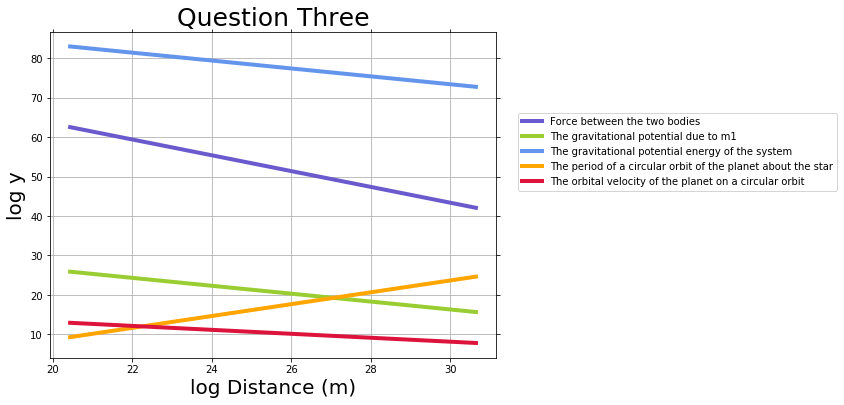

In [13]:
#plotting
fig1,ax1 =plt.subplots(figsize=(8,6))
ax1.plot(logx_force,logy_force,color='slateblue',label='Force between the two bodies',linewidth='4')
ax1.plot(xpotm1_log,ypotm1_log,color='yellowgreen',label='The gravitational potential due to m1',linewidth='4')
ax1.plot(xpot_log,ypot_log,color='cornflowerblue',label='The gravitational potential energy of the system',linewidth='4')
ax1.plot(xperiod_log,yperiod_log,color='orange',label='The period of a circular orbit of the planet about the star',linewidth='4')
ax1.plot(xvelocity_log,yvelocity_log,color='crimson',label='The orbital velocity of the planet on a circular orbit',linewidth='4')

ax1.set_xlabel('log Distance (m)',fontsize=20)
ax1.set_ylabel('log y',fontsize=20)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_title("Question Three", fontsize = 25)
ax1.grid()

plt.legend(loc='lower right',bbox_to_anchor=(1.5, 0.5),bbox_transform=plt.gcf().transFigure)
plt.show()

## Question Four, Five and Six

These problems are done on paper. See end for attached work

## Question Seven

In [14]:
MJD, m_v, v1, v2=loadtxt('binary.dat',unpack=True,skiprows=6,usecols=(0,1,2,3))

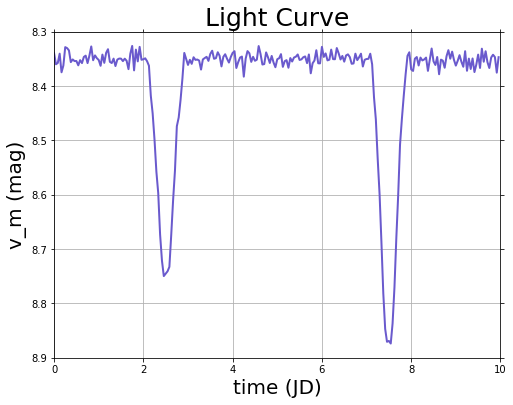

In [15]:
time7 = MJD-54710

#plotting
fig2,ax2 =plt.subplots(figsize=(8,6))
ax2.plot(time7,m_v,color='slateblue',linewidth='2')

ax2.set_xlabel('time (JD)',fontsize=20)
ax2.set_ylabel('v_m (mag)',fontsize=20)
ax2.axis([0,10,8.9,8.3]) 

ax2.tick_params(axis='both',which='minor',direction='in')
ax2.tick_params(top=True,right=True)
ax2.tick_params(which='minor',top=True,right=True)

ax2.set_title("Light Curve", fontsize = 25)
ax2.grid()

#plt.legend(loc='lower right',bbox_to_anchor=(1.5, 0.5),bbox_transform=plt.gcf().transFigure)
plt.show()

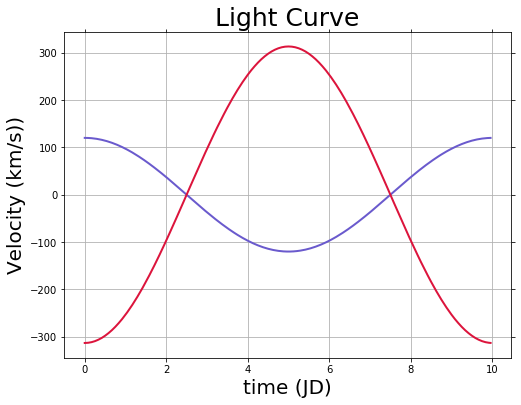

In [16]:
fig3,ax3 =plt.subplots(figsize=(8,6))
ax3.plot(time7,v1,color='slateblue',linewidth='2')
ax3.plot(time7,v2,color='crimson',linewidth='2')

ax3.set_xlabel('time (JD)',fontsize=20)
ax3.set_ylabel('Velocity (km/s))',fontsize=20)

ax3.tick_params(axis='both',which='minor',direction='in')
ax3.tick_params(top=True,right=True)
ax3.tick_params(which='minor',top=True,right=True)

ax3.set_title("Light Curve", fontsize = 25)
ax3.grid()

#plt.legend(loc='lower right',bbox_to_anchor=(1.5, 0.5),bbox_transform=plt.gcf().transFigure)
plt.show()

1) Finding period

In [17]:
period_days = (np.max(time7)-np.min(time7))

print("The period is",period_days, "days")

The period is 9.95799999999872 days


2) Finding mass ratio

In [18]:
#v1/v2 = m2/m1

mass_r = (np.max(v1)/np.max(v2))
print("The mass ratio (m2/m1) is",mass_r)

The mass ratio (m2/m1) is 0.38338658146964855


Since the mass ratio is less than one, we know that v1 is the larger object. 

3) Finding inclination

As the inclination decreases from 90 to 0, the amplitude of the curves decreases. Really, you can't know for sure what the inclination is based off of these two plots, but because the amplitude isn't too shallow in the velocity curve, we can assume that the inclination is probably around 90 degrees. 

4) Finding eccentricity

Looking at the velocity curve again, we can guess that the eccentricity is about 0 (that the orbit is near-circular). This is because the curves on the velocity-light plot don't make any sudden changes and in general transition "smoothly." From a more elipitcal orbit, we would expect sharper peaks and brouder dips, however similar to the inclination, we can't know an _exact_ eccentricity. 

5) Finding the semi-major axis

In [19]:
period_sec = period_days*24*60*60

ax = (period_sec*(np.max(v1)+np.max(v2)))/(2*np.pi)
print("The semi-major axis is",ax,"km")

The semi-major axis is 59291698.61889355 km


6) Finding the individual masses

In [20]:
ax_m = ax*1000 #a in meters
g = 6.67*(10**-11) #Nm/kg

M = (4*(np.pi**2)*ax_m**3)/((period_sec**2)*g)
M_solar = M/(1.989*(10**30))

m2 = M_solar*mass_r
m1 = M_solar - m2

print("So the mass of m1 is",np.round(m1),"solar masses and the mass of m2 is",np.round(m2),"solar masses")
#These are huge stars. Am I doing it wrong?

So the mass of m1 is 52.0 solar masses and the mass of m2 is 32.0 solar masses


7) Finding the stellar radii

We need to mezasure from first to third contact on the light curves for both objects. Let's get a closer look:

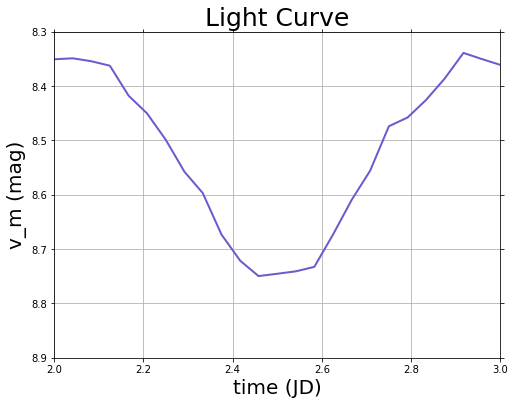

In [21]:
#First Dip
fig4,ax4 =plt.subplots(figsize=(8,6))
ax4.plot(time7,m_v,color='slateblue',linewidth='2')

ax4.set_xlabel('time (JD)',fontsize=20)
ax4.set_ylabel('v_m (mag)',fontsize=20)
ax4.axis([0,10,8.9,8.3]) 
ax4.set_xlim(2,3)

ax4.tick_params(axis='both',which='minor',direction='in')
ax4.tick_params(top=True,right=True)
ax4.tick_params(which='minor',top=True,right=True)

ax4.set_title("Light Curve", fontsize = 25)
ax4.grid()

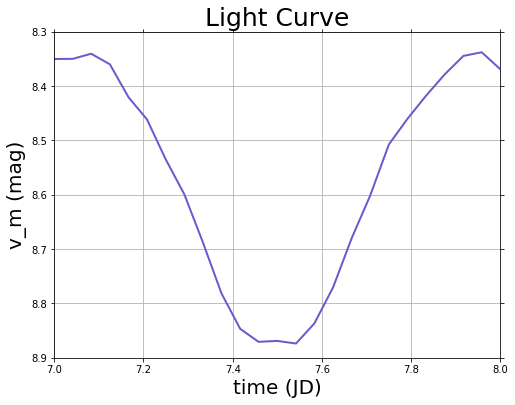

In [22]:
# Second dip
fig5,ax5 =plt.subplots(figsize=(8,6))
ax5.plot(time7,m_v,color='slateblue',linewidth='2')

ax5.set_xlabel('time (JD)',fontsize=20)
ax5.set_ylabel('v_m (mag)',fontsize=20)
ax5.axis([0,10,8.9,8.3]) 
ax5.set_xlim(7,8)

ax5.tick_params(axis='both',which='minor',direction='in')
ax5.tick_params(top=True,right=True)
ax5.tick_params(which='minor',top=True,right=True)

ax5.set_title("Light Curve", fontsize = 25)
ax5.grid()
plt.show()

Looking at these plots, for the fist dip we can guess that the first contact takes place at t = 2.13 and that the third contact happens at t = 2.58. For the second dip we can guess that the first contact takes place at t = 7.09 and that the third contact happens at t = 7.55.

In [23]:
v_rel = (np.max(v1)+np.max(v2))


t1_1 = 2.10
t1_2 = 2.58

t2_1 = 7.09
t2_2 = 7.52

tdiff1 = (t1_2 - t1_1)*24*60*60
tdiff2 = (t2_2 - t2_1)*24*60*60

r1 = ((v_rel/2)*tdiff1)/695700
r2 = ((v_rel/2)*tdiff2)/695700

print("So the radius of m1 is",np.round(r1,1),"solar radii and the radius of m2 is",np.round(r2,1),"solar radii")

So the radius of m1 is 12.9 solar radii and the radius of m2 is 11.6 solar radii


Going with my giant stars, I guessed that m1 is a type 5 O5 star and that m2 is a type V O6 star. That being said, I know that the radius of the star changes by a lot even when I change my times just a little bit, so I feel like there coulf have been a more accurate way to find the contacts (curve_fit?) and I still am hesitant about my masses. I'm pretty sure I followed the right steps in my head, but maybe I did something wrong computationally? Or maybe they're just giant stars. Anyways:

m1 --> T = 42000 K
       
m2 --> T = 39500 K

Using the Boltzman Equation for luminosity, we can find the luminosity of both stars. 

In [24]:
r1_m = r1*(6.957*(10**8))
r2_m = r2*(6.957*(10**8))

sigma = 5.67*(10**-8) #m2 kg s-2 K-1
temp1 = 42000
temp2 = 39500

def lum(temp,sigma,r):
    L = 4*np.pi*(r**2)*sigma*temp**4
    return L

L1 = lum(temp1, sigma, r1_m)
L2 = lum(temp2, sigma, r2_m)

L1_sun = L1/(3.827*(10**26)) #lum of sun in watts since stefan-boltz conts. in watts
L2_sun = L2/(3.827*(10**26))

print("So the luminosity of m1 is",np.round(L1_sun,1),"solar luminosities and the luminosity of m2 is",np.round(L2_sun,1),"solar luminosities")

So the luminosity of m1 is 467043.6 solar luminosities and the luminosity of m2 is 293226.4 solar luminosities


Now we can use the combined luminosities of the stars to get a distance. In order to do so though, we need an Absolute magnitude. Looking at the light plot, I took the absolute magnitude to be 8.35. 

In [25]:
Lum_tot = L1_sun = L2_sun
Abs_mag = -2.5*np.log(Lum_tot)+5
dist_mod = 8.35 - Abs_mag
dist = 10*(10**(dist_mod/5))
print("So the distance is",np.round(dist),"pc")

So the distance is 92119190.0 pc


So, this is a large number, probably because I took both of my stars to be O stars which are both quite hot and bright. Regardless, this is still a pretty uncertain way to find the distance so I would not trust my number. A lot of assumptions were made to get here. 

## Question Eight

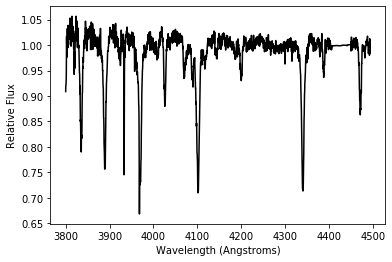

In [26]:
# python program to read in a fits file containing a spectrum
# and plot it
# FITS is the Flexible Image Transport System format (.fits)
# used by astronomers to store image data

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# name a file to open
fname='/Users/alexh/Desktop/Coding/homework/astrophysics/HW03_spectra/Spectra01.fits'
# note that the singular form of spectra is 'spectrum'.
# please practice good scientific grammar

hdu = fits.open(fname)
data=hdu[0].data
hdr = hdu[0].header
hdr # print header to see what's in the meta data
# next pick out cettain keywords that tell us how to
#  create an array of wavelengths that go with each data value in the spectrum
crval1=hdr['CRVAL1']
cdelt1=hdr['CDELT1']
crpix1=hdr['CRPIX1']
#  CDELT1 specifies the increment per pixel and
#  CRVAL1 gives the wavelength of the reference pixel,
#  CRPIX1 which is usually 1, but not always, specifies which pixel has CRVAL1
# create wavelength array using equation of a line
wavl=crval1 + cdelt1*(np.arange(0,len(data))-crpix1 )

# plot part or all of spectrum; this is a spectrum that has been
# 'continuum normalized' so that the units are relative to 1.0
plt.plot(wavl,data,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');
#plt.axis([4000,5000,0,1]) # set plot range as desired

# close plot
plt.show()

Looking at the published spectra in the Silva & Cornell paper, my best guess is that this is an A7 star. Other types of stars I thought about were F0, A3, and a few others kinds of stars. It was kinda hard to figure out what the star might be, (NOT as easy as quasars!!), but ultimately my guess is A7 I think based on the intensity of the hydrogren gamma line and where the continuum peaked relative to the wavelength axis. 

If this is an A7 star, looking at Appendix E of C&O, I can guess that the mass is about 2.0 solar masses (looking at the A5 star data). 

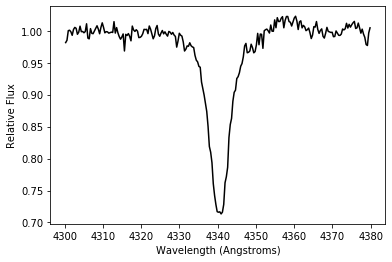

In [27]:
wavarr = np.array(wavl)
loc = np.where((wavarr >= 4300 ) & (wavarr <= 4380))
halpha_wav = wavarr[loc] #actually h gamma but whatever
halpha_flux = data[loc]

plt.plot(halpha_wav,halpha_flux,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

Getting a closer look, we the hydrogen gamma absorbing around 4340 Angstoms. I'm going fit a guassian to this data

The center is at  [4340.38887979] Angstroms


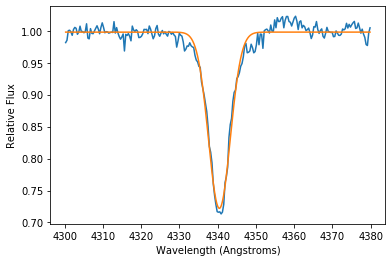

In [28]:
def line1(x,a1,mu,sig,c):
    y1 = 1 + a1*e**((-(x-mu)**2)/(2*sig**2))+c
    return y1

gg = np.mean(halpha_wav)
sd = np.std(halpha_wav)

p2= np.array([1,gg,sd,0])
coeff1, covar_matrix1 = curve_fit(line1, halpha_wav, halpha_flux,p0=p2)
xarr2=np.linspace(np.min(halpha_wav),np.max(halpha_wav),1000)
yarr2=line1(xarr2,*coeff1)

fluc_min = (np.min(yarr2))
cent_loc = np.where(yarr2 == fluc_min)
cent = xarr2[cent_loc]
print("The center is at ",cent, "Angstroms")

plt.plot(halpha_wav,halpha_flux)
plt.plot(xarr2,yarr2)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

Now knowing a good approximation for the center of our line by fitting a guassian (4340 Angstroms) we can find the velocity shift. Using the SDSS rest wavelength table, we can say that the rest wavlenfth of hydrogen gamma is 4341.68 Angstroms. We know that:

z = (lamda_o - lamda_r)/lambda_r

z = v/c

v = c*z

In [29]:
lambda_o = cent
lambda_r = 4341.68
c = 300000

z = (lambda_o - lambda_r)/lambda_r
v = c*z
print('The velocity shift is', np.round(v), "km/s")

The velocity shift is [-89.] km/s


Now time to do this for every spectra. Heads up, I did a lot of copy-and-paste code here. 

In [30]:
def openfits(Spectra):
    fname = fits.open('/Users/alexh/Desktop/Coding/homework/astrophysics/HW03_spectra/{}.fits'.format(Spectra))
    return fname

In [31]:
hdu1 = openfits("Spectra01")
hdu2 = openfits("Spectra02")
hdu3 = openfits("Spectra03")
hdu4 = openfits("Spectra04")
hdu5 = openfits("Spectra05")
hdu6 = openfits("Spectra06")
hdu7 = openfits("Spectra07")
hdu8 = openfits("Spectra08")
hdu9 = openfits("Spectra09")
hdu10 = openfits("Spectra10")
hdu11 = openfits("Spectra11")
hdu12 = openfits("Spectra12")
hdu13 = openfits("Spectra13")
hdu14 = openfits("Spectra14")
hdu15 = openfits("Spectra15")

In [32]:
def getdate(specfile):
    hdr = specfile[0].header
    dates = hdr['DATE-OBS']
    time = hdr['UT']
    date = dates,time 
    return date

In [33]:
print(getdate(hdu1))
print(getdate(hdu2))
print(getdate(hdu3))
print(getdate(hdu4))
print(getdate(hdu5))
print(getdate(hdu6))
print(getdate(hdu7))
print(getdate(hdu8))
print(getdate(hdu9))
print(getdate(hdu10))
print(getdate(hdu11))
print(getdate(hdu12))
print(getdate(hdu13))
print(getdate(hdu14))
print(getdate(hdu15))

('2001-09-10', '03:32:58.06')
('2001-09-10', '05:59:01')
('2001-09-10', '08:36:10')
('2001-09-11', '02:28:18')
('2001-09-11', '04:19:22')
('2001-09-11', '09:04:35')
('2001-09-11', '10:32:14')
('2001-09-12', '02:11:55')
('2001-09-12', '04:55:52')
('2001-09-13', '01:34:07')
('2001-09-13', '04:34:07')
('2001-09-13', '06:02:44')
('2001-09-13', '08:12:37')
('2001-09-14', '03:00:22')
('2001-09-14', '05:04:11')


From here I decided to just plug these values into the online Julian date converter and construct an array of Julian times

In [34]:
JD = (2451950.64789, 2451950.74932, 2451950.85845, 2451951.60299, 2451951.68012, 2451951.87818, 2451951.93905, 2451952.59161, 2451952.70546, 2451953.56536, 2451953.69036, 2451953.75190, 2451953.84209, 2451954.62525, 2451954.71124)

Now it's time to find the velocitoes of all the spectra

In [35]:
def getvelocity(specfile):
    hdr = specfile[0].header
    data=specfile[0].data
    
    crval1=hdr['CRVAL1']
    cdelt1=hdr['CDELT1']
    crpix1=hdr['CRPIX1']
    
    wavl=crval1 + cdelt1*(np.arange(0,len(data))-crpix1 )
    
    wavarr = np.array(wavl)
    loc = np.where((wavarr >= 4300 ) & (wavarr <= 4400))
    halpha_wav = wavarr[loc]
    halpha_flux = data[loc]
    
    def line1(x,a1,mu,sig,c):
        y1 = 1 + a1*e**((-(x-mu)**2)/(2*sig**2))+c
        return y1
    
    gg = np.mean(halpha_wav)
    sd = np.std(halpha_wav)

    p2= np.array([1,gg,sd,0])
    coeff1, covar_matrix1 = curve_fit(line1, halpha_wav, halpha_flux,p0=p2)
    xarr2=np.linspace(np.min(halpha_wav),np.max(halpha_wav),1000)
    yarr2=line1(xarr2,*coeff1)
    
    fluc_min = (np.min(yarr2))
    cent_loc = np.where(yarr2 == fluc_min)
    cent = xarr2[cent_loc]
    
    plt.plot(halpha_wav,halpha_flux)
    #plt.plot(xarr2,yarr2)
    plt.xlabel('Wavelength (Angstroms)');
    plt.ylabel('Relative Flux');
    
    lambda_o = cent
    lambda_r = 4341.68
    c = 300000 #km/s
    
    z = (lambda_o - lambda_r)/lambda_r
    v = c*z
    return v

(-83.44785037334552, 74.16260565963728, 236.89658530120263, 618.0386581009793, 556.8367304663012, 333.04332350981156, 240.35146912498848, -724.216288305083, -804.1741077957803, -232.11050831919852, -22.685113102805325, 74.16260565963728, 208.0180615011931, 618.0386581009793, 529.5700028840834)


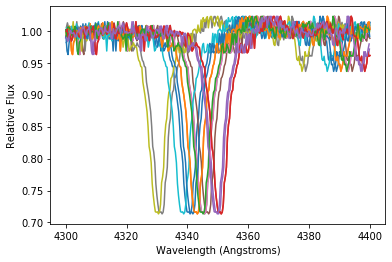

In [36]:
v1 = getvelocity(hdu1)[0]
v2 = getvelocity(hdu2)[0]
v3 = getvelocity(hdu3)[0]
v4 = getvelocity(hdu4)[0]
v5 = getvelocity(hdu5)[0]
v6 = getvelocity(hdu6)[0]
v7 = getvelocity(hdu7)[0]
v8 = getvelocity(hdu8)[0]
v9 = getvelocity(hdu9)[0]
v10 = getvelocity(hdu10)[0]
v11 = getvelocity(hdu11)[0]
v12 = getvelocity(hdu12)[0]
v13 = getvelocity(hdu13)[0]
v14 = getvelocity(hdu14)[0]
v15 = getvelocity(hdu15)[0]


all_v = (v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15)
print(all_v)

This is kind of a pointless graph, but it looks cool as hell so I'm keeping it in. 

Text(0, 0.5, 'velocity (k/s)')

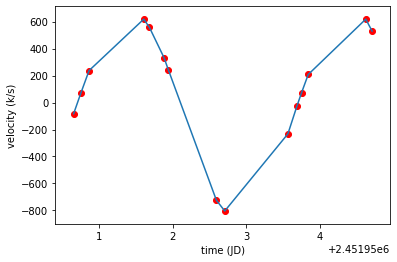

In [37]:
plt.plot(JD,all_v)
plt.scatter(JD,all_v,color="red")
plt.xlabel('time (JD)')
plt.ylabel('velocity (k/s)')

This looks a little wonky, but I'm not entirely convinced it's wrong. I think perhaps by looking at the orbit as an outside observor, the periastron mught be unique. Different periastrons did give us interesting shapes when we messed with velocity-time plots in class. 

Assuming "velocity amplitude" means the amplitude of the "curve", we measuure the largest velocity shift to be about -804.17 km/s. 

Looking at this plot, we see that the shape is beginning to repeat itself. One full period would be from the first point to about the 12th point. If we look at the list of dates, we can figure out the exact time difference betweeen the spectra01 and spectra12:

In [68]:
time = (JD[12] - JD[1])
timesec = time*24*60*60
print(time,"days have elapsed")

3.092769999988377 days have elapsed


In [69]:
v = -804170 #m/s
p = timesec
G = 6.67*(10**-11)

R = (v*p)/(2*np.pi)
print("The orbital seperation is", np.abs(R), "km or 0.229 AU")

The orbital seperation is 34200256686.908268 km or 0.229 AU


To find the mass of the companion we can use the mass function which looks like:

(m2^2/(m1+m2)^2)(sin(i))^3 = (p/(2piG))(v1r^3)

We can assume the inclination to be 90 to get:

(m2^2/(m1+m2)^2) = (p/(2piG))(v1r^3)

solving for the right side of the equation:

In [70]:
right = (p*(v**3))/(2*np.pi*G)

print(right)

-3.315883522800577e+32


We can solve for the combined masses I think this way? :

In [71]:
R_m = R*1000 #a in meters

M = np.abs((4*(np.pi**2)*R_m**3)/((p**2)*G))

#m1 = M_solar*mass_r
#m1 = M_solar - m2

print(M)

3.315883522800576e+41


Then square, multiply it to the right side of the equation and cube-root it:

In [74]:
nright = np.abs(right*(M**2))
comp = nright**(0.3333)

comp_solar = comp/(1.989*(10**30))

print("So the mass of the companion is", comp_solar, "solar masses")

So the mass of the companion is 165238948.85639575 solar masses


Which is completely wrong. I know also know this is a Quintic equation which means you can't analytically solve for m2 or get m2 alone, but I think knowing the combined masses we can still figure it out this way. I'm just not sure I found the combined mass correctly or used the right v. And if you can't find the combined mass, it would be a lot of guess-and-check until we got something that looked like the right side of the mass function. 